In [1]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from helpers import *

## Connect to DataRobot

In [ ]:
import datarobot as dr
client = dr.Client(os.environ["DATAROBOT_API_TOKEN"], os.environ["DATAROBOT_ENDPOINT"])

In [ ]:
client.get("/ping").json()

## Adding data to AI Catalog

In [ ]:
dataset = dr.Dataset.create_from_file("hotdog-not-hotdog.zip")

## Starting Project

### Dataframe of encoded images

In [ ]:
dataset

In [ ]:
project = dr.Project.create_from_dataset(dataset.id)

In [ ]:
project.get_features()

In [ ]:
project.set_target("class")
project.set_worker_count(-1)

In [ ]:
model = project.get_models()[0]
model

## Deploying and Scoring Images

In [ ]:
deployment = dr.Deployment.create_from_learning_model(model.id, 
                                                      label = "hotdog not hotdog", 
                                                      description = "predict if picture is of hot dog or not",
                                                      default_prediction_server_id = dr.PredictionServer.list()[0].id)

In [2]:
deployment_id = "5f988585fb99ee0c25c73f30"

In [3]:
image_path = os.path.abspath("hotdog-not-hotdog/train/hot_dog/7896.jpg")

In [4]:
base64_encoded_image = convert_to_base64(image_path)

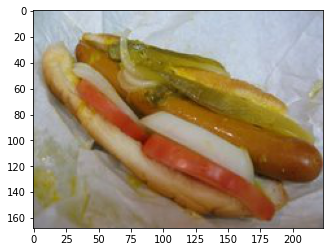

In [5]:
plt.imshow(stringToRGB(base64_encoded_image))

In [6]:
df = pd.DataFrame( [base64_encoded_image], columns = ["image"])

In [7]:
df

,image
0,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBA...


In [9]:
API_URL = 'yourendpoint'    # noqa
API_KEY = 'yourtoken'
MAX_PREDICTION_FILE_SIZE_BYTES = 52428800  # 50 MB

headers = {
    'Content-Type': 'text/plain; charset=UTF-8',
    'Authorization': 'Bearer {}'.format(API_KEY)
}

url = API_URL.format(deployment_id=deployment_id)
# Make API request for predictions
predictions_response = requests.post(
    url,
    data=df.to_csv(),
    headers=headers,
)

In [10]:
pprint(predictions_response.json())

{'data': [{'deploymentApprovalStatus': 'PENDING',
           'prediction': 'hot_dog',
           'predictionThreshold': 0.5,
           'predictionValues': [{'label': 'not_hot_dog', 'value': 0.0192054864},
                                {'label': 'hot_dog', 'value': 0.9807945136}],
           'rowId': 0}]}
